In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from cleaning import df

I need to figure out how to quantify a "prime," so to start, I am making a new column that is the sum of all the stats for a single season.

In [2]:
df_int = df.drop(columns=['player','height', 'age', 'href', 'tm', 'lg', 'pos'])
totals = np.empty(len(df))
for i, row in df_int.iterrows():
    totals[i] = sum(row)
totals = pd.DataFrame({'season_tot':totals})
df = pd.concat([df, totals], axis=1)

The relationship between each stat and the season_tot statistic takes a variety of forms. Assists is very amorphous; points is more tightly grouped and linear; and total rebounds has a similar shape as the previous two but with a more tightly grouped points than assists.

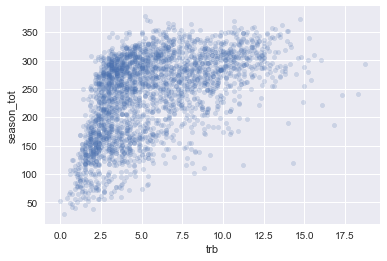

In [3]:
_ = df.plot(kind='scatter', x='trb', y='season_tot', alpha=.2)

I want create a column named "rough_prime" where a player's top 5 season_tot counts will equal 1 while the rest will equal 0.

In [7]:
seasons = np.empty(len(df))
for player in df.player.unique():
    player_df = df[df.player == player]
    tots = player_df.season_tot.sort_values(ascending=False)
    for i, n in enumerate(tots.index):
        if i < 5:
            seasons[n] = 1
        else:
            seasons[n] = 0
df_int['rough_prime'] = seasons

In [16]:
df_int.corr()['rough_prime'].sort_values(ascending=False)

rough_prime        1.000000
gs                 0.473367
g                  0.402064
mp                 0.387908
pts                0.365047
fg                 0.364603
fga                0.348764
twop               0.319761
twopa              0.309992
ft                 0.290094
allstar            0.288626
tov                0.281223
fta                0.276510
stl                0.240479
ast                0.204733
pf                 0.196225
drb                0.190741
trb                0.184539
efgp               0.150216
orb                0.144222
fgp                0.139239
twopp              0.134191
threep             0.125158
threepa            0.117368
blk                0.089872
ftp                0.085762
threepp            0.041911
years_in_league   -0.177848
Name: rough_prime, dtype: float64

In [10]:
def normalize(ls):
    '''Performs min-max feature scaling normalization on a sequence'''
    return [(num - min(ls))/(max(ls)-min(ls)) for num in ls]

In [31]:
df.height

0       86.0
1       86.0
2       86.0
3       86.0
4       86.0
5       86.0
6       86.0
7       86.0
8       78.0
9       78.0
10      78.0
11      78.0
12      78.0
13      78.0
14      78.0
15      78.0
16      78.0
17      78.0
18      78.0
19      78.0
20      78.0
21      78.0
22      78.0
23      78.0
24      78.0
25      78.0
26      78.0
27      78.0
28      78.0
29      78.0
        ... 
2642    76.0
2643    76.0
2644    76.0
2645    76.0
2646    76.0
2647    76.0
2648    76.0
2649    76.0
2650    73.0
2651    73.0
2652    73.0
2653    73.0
2654    73.0
2655    73.0
2656    73.0
2657    73.0
2658    73.0
2659    73.0
2660    73.0
2661    73.0
2662    73.0
2663    73.0
2664    84.0
2665    84.0
2666    84.0
2667    84.0
2668    84.0
2669    84.0
2670    84.0
2671    84.0
Name: height, Length: 2672, dtype: float64

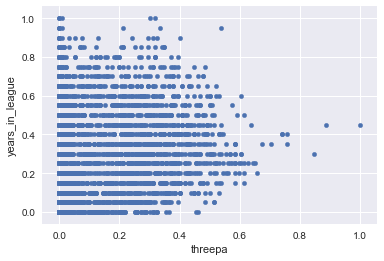

In [22]:
normed.plot(kind='scatter', x='threepa', y='years_in_league')

player
href
tm
lg
pos


C:\Users\Drew\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


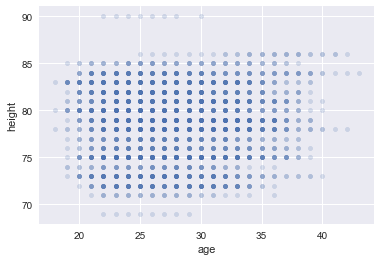

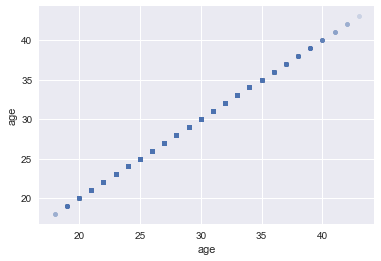

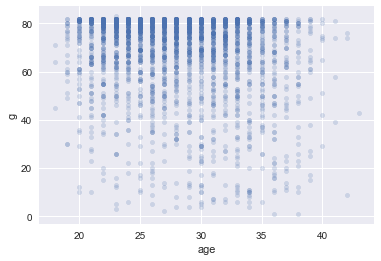

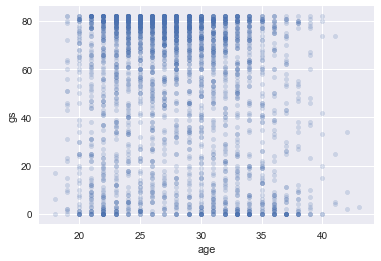

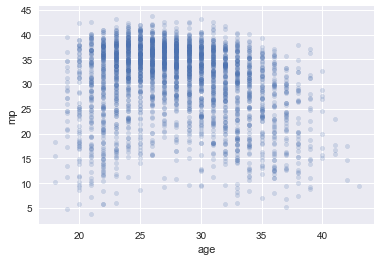

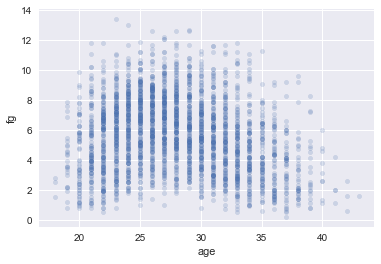

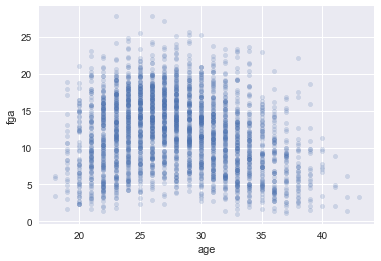

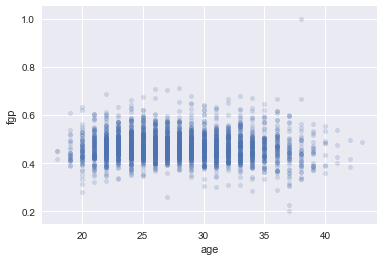

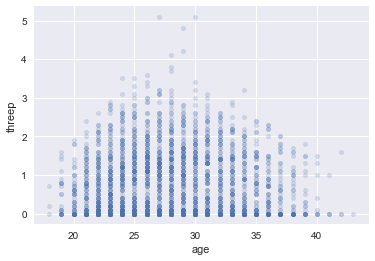

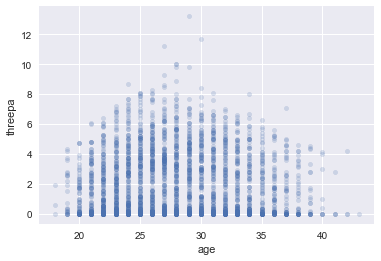

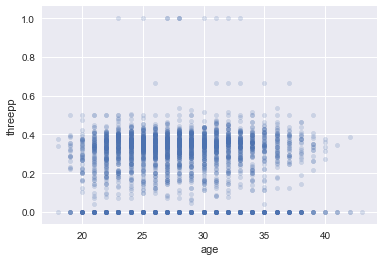

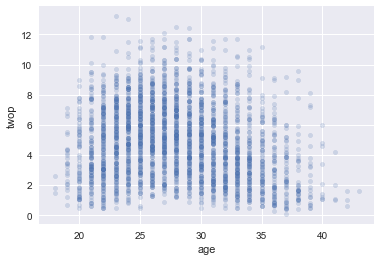

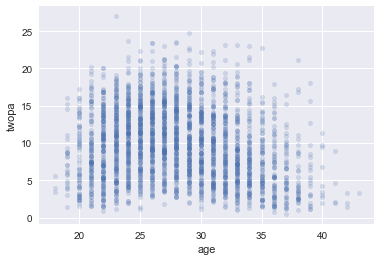

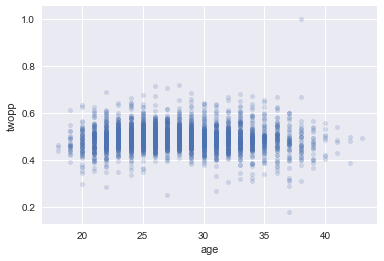

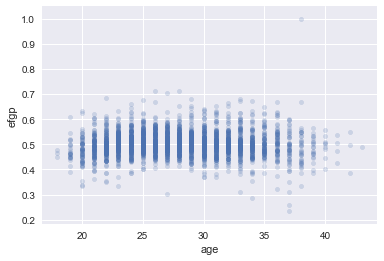

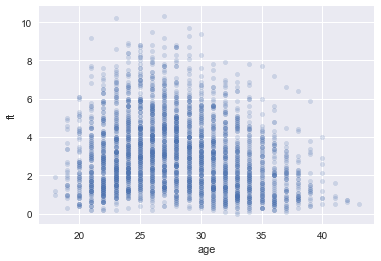

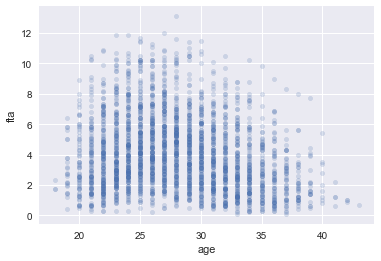

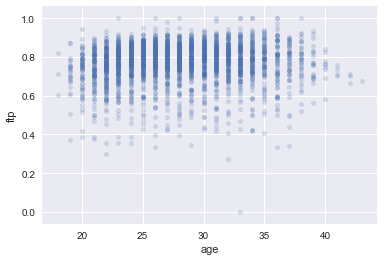

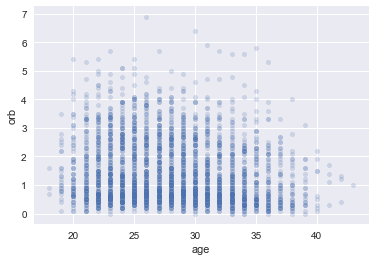

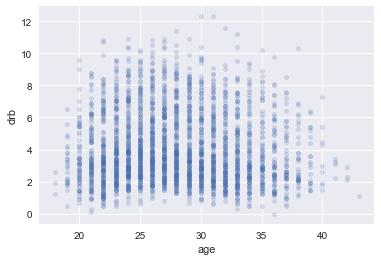

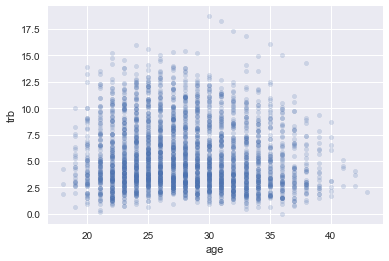

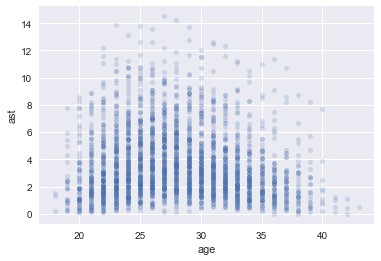

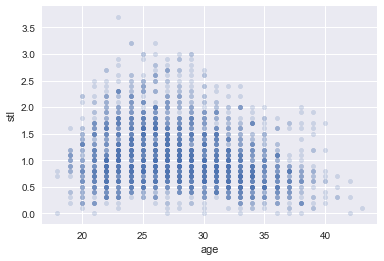

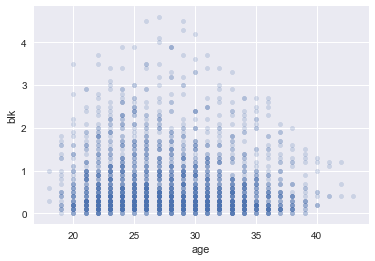

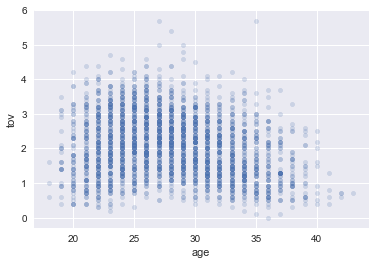

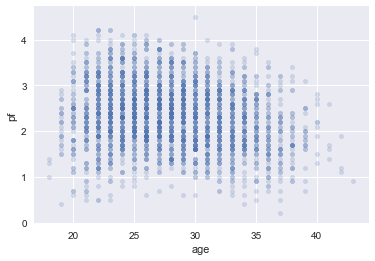

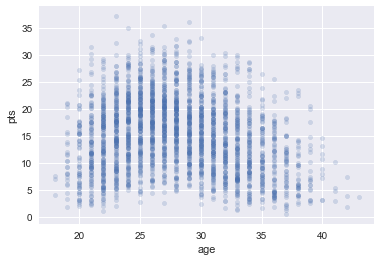

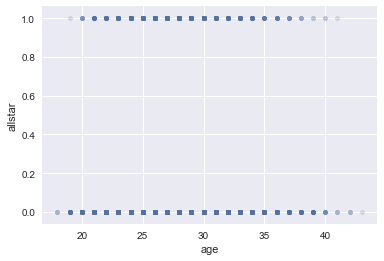

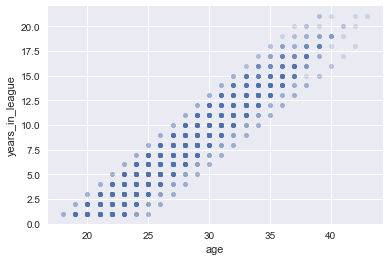

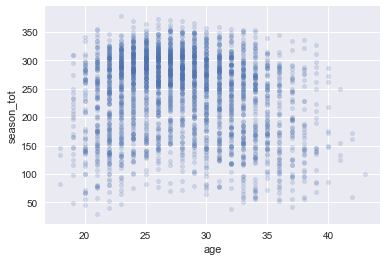

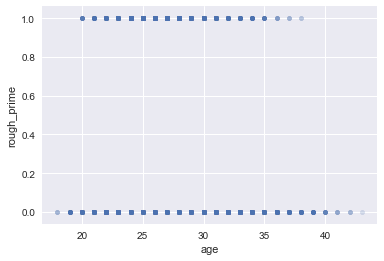

In [100]:
for column in df:    
    try:
        _ = df.plot(kind='scatter', x='age', y=column, alpha=.2)
    except:
        print(column)

I want to check correlations between all the different 

C:\Users\Drew\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


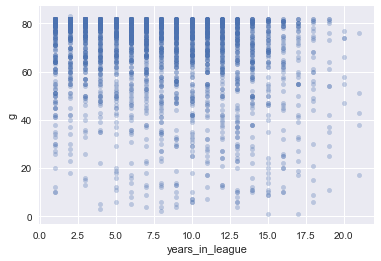

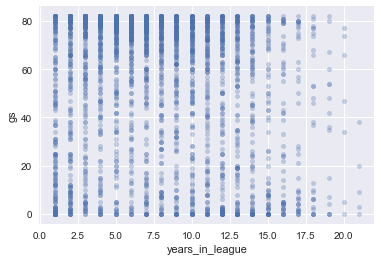

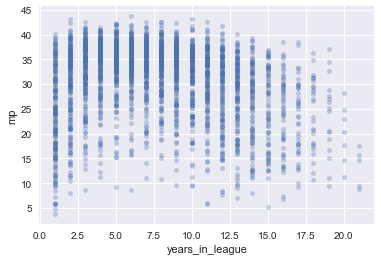

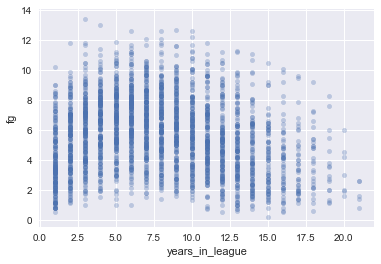

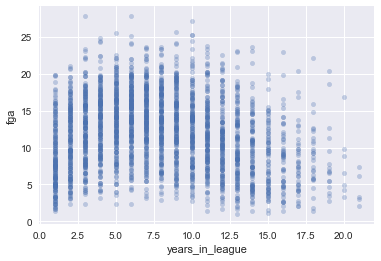

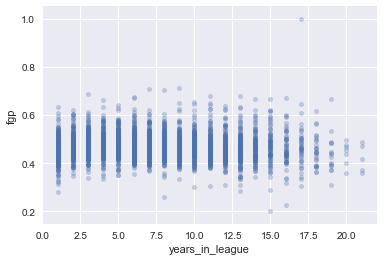

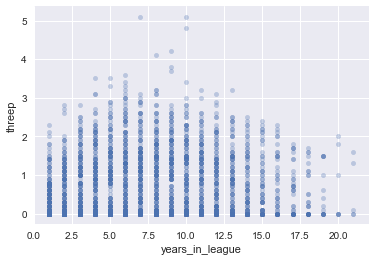

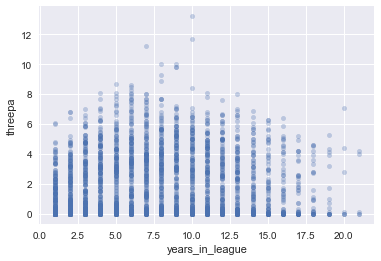

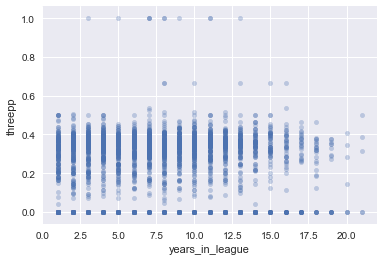

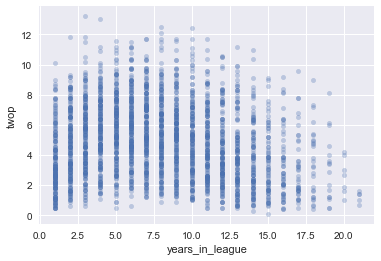

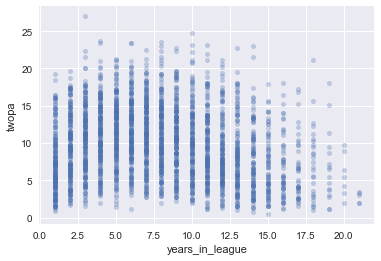

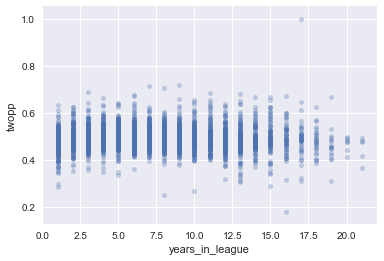

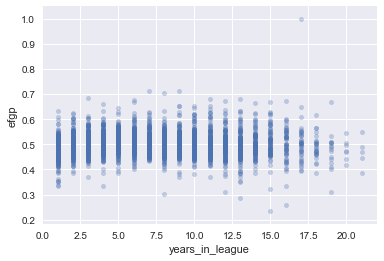

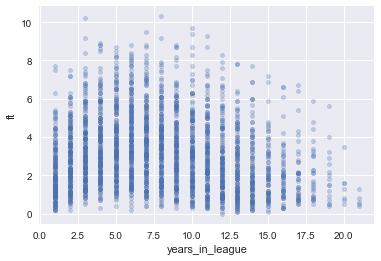

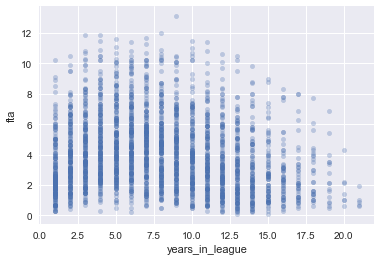

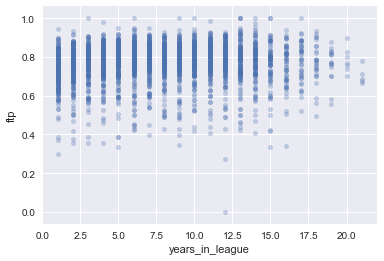

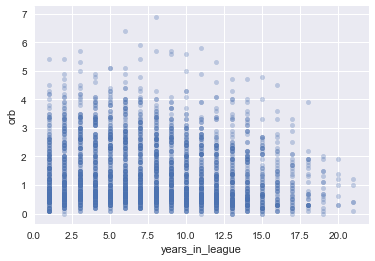

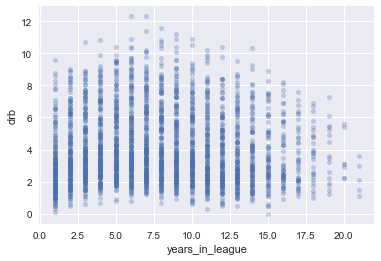

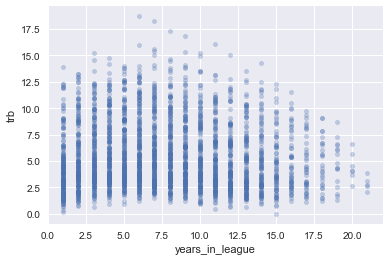

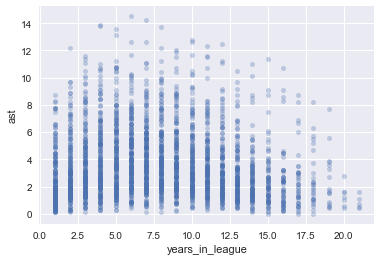

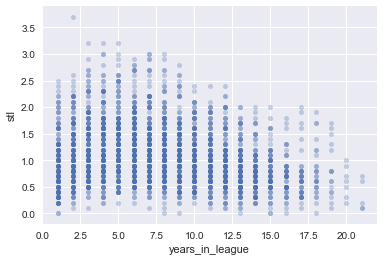

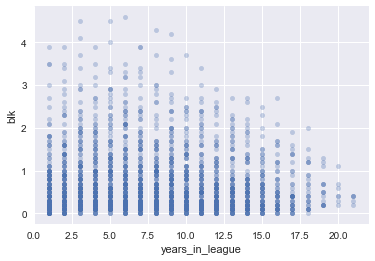

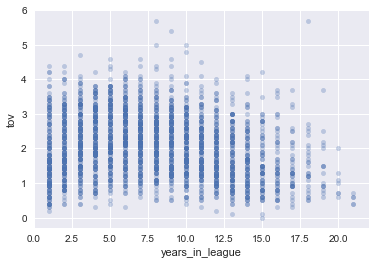

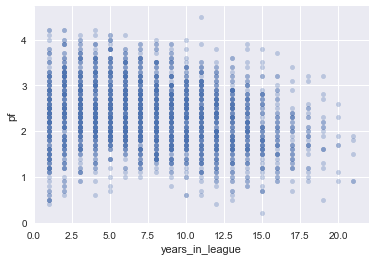

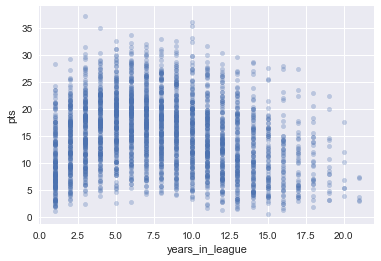

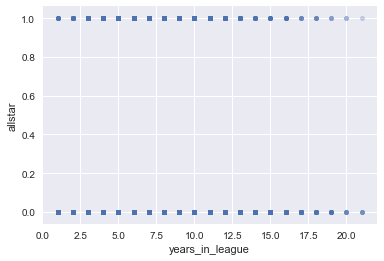

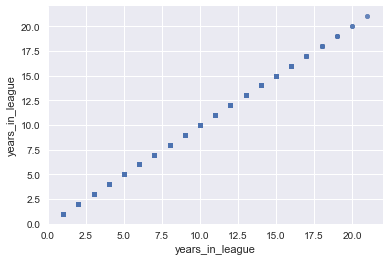

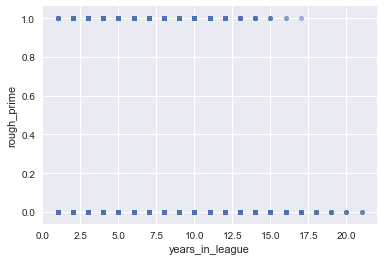

In [101]:
for col in df_int:
    df.plot(kind='scatter', x='years_in_league', y=col, alpha=0.3)

In [102]:
df_int.years_in_league.quantile([.25, .33, .50, .66, .75])

0.25     4.0
0.33     5.0
0.50     7.0
0.66    10.0
0.75    11.0
Name: years_in_league, dtype: float64

In [103]:
df4 = df_int[df_int['years_in_league'] <= 4]
df57 = df_int[(df_int['years_in_league'] > 4) 
               & (df_int['years_in_league'] <= 7)]
df811 = df_int[(df_int['years_in_league'] > 7) 
               & (df_int['years_in_league'] <= 11)]
df21 = df511 = df_int[df_int['years_in_league'] > 11]

In [104]:
len(df4), len(df57), len(df811), len(df21)

(754, 597, 707, 614)

C:\Users\Drew\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


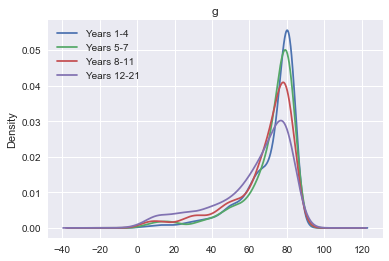

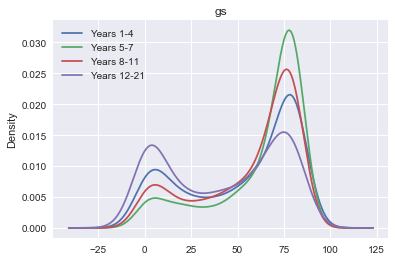

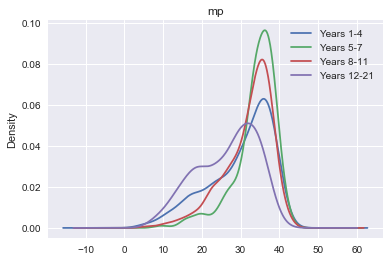

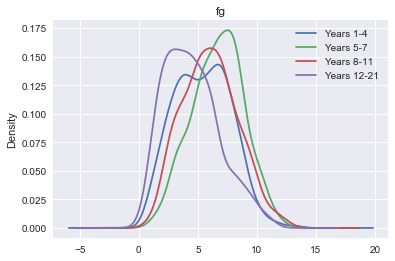

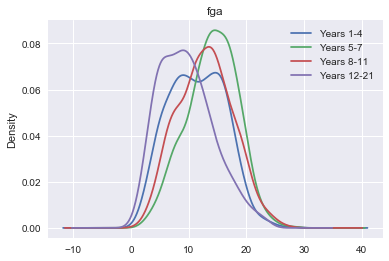

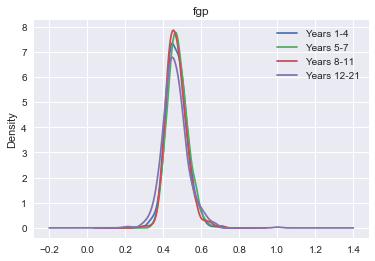

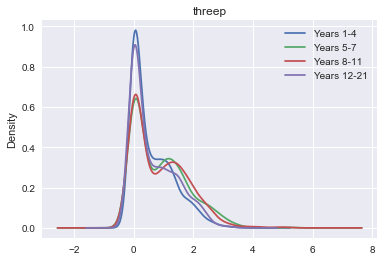

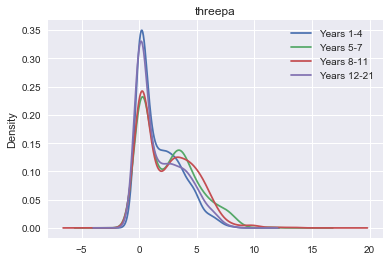

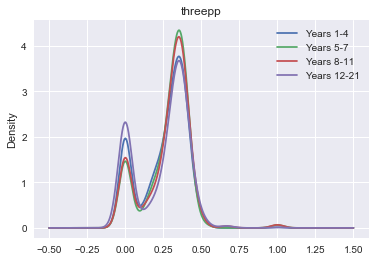

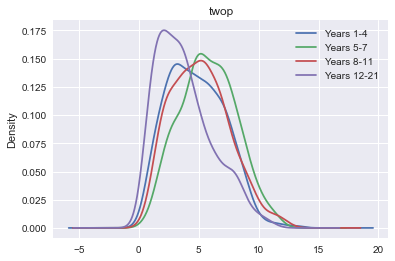

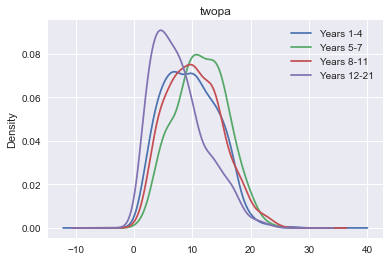

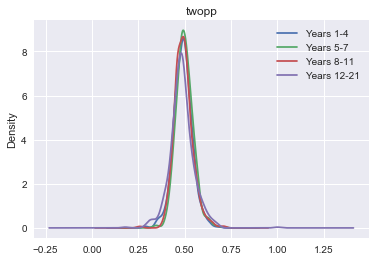

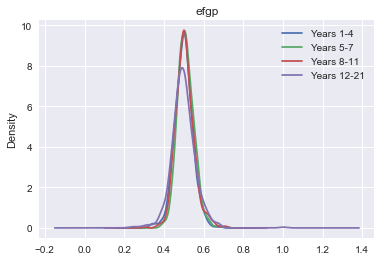

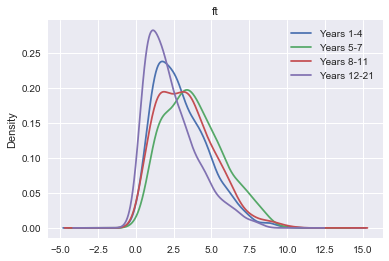

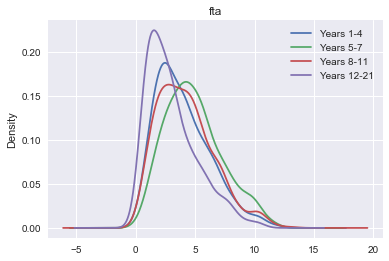

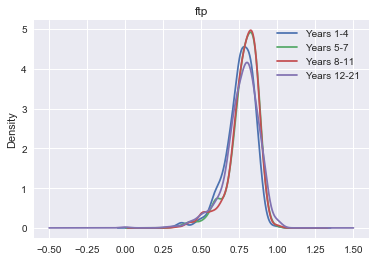

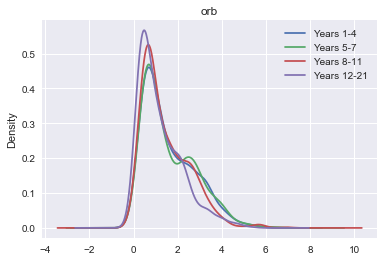

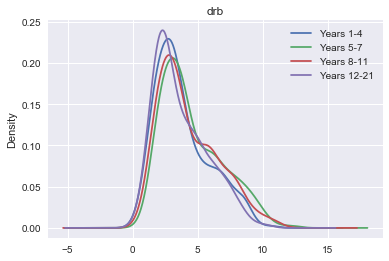

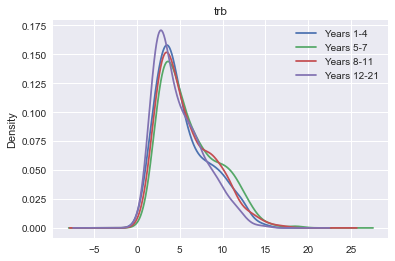

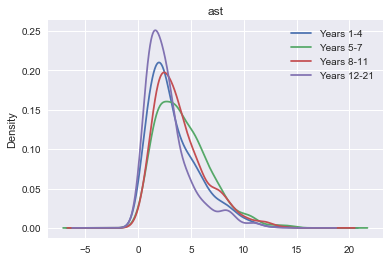

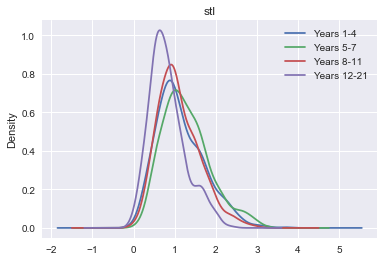

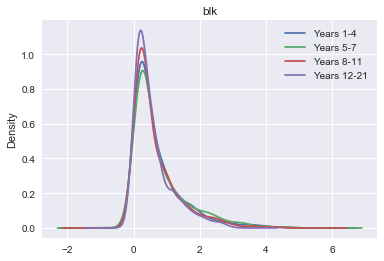

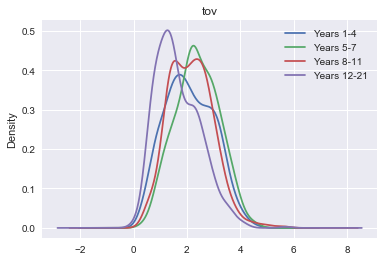

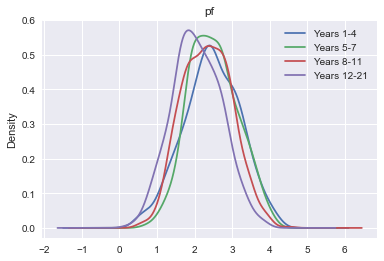

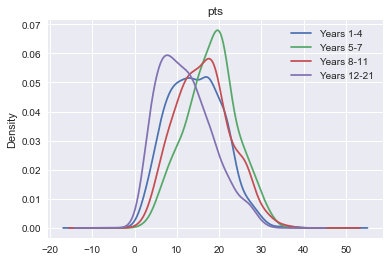

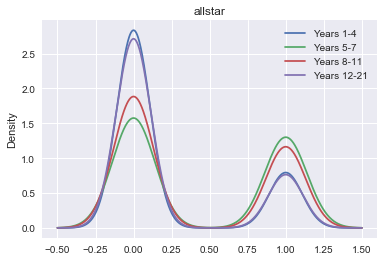

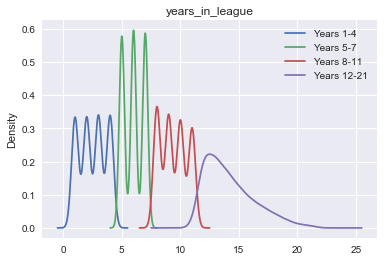

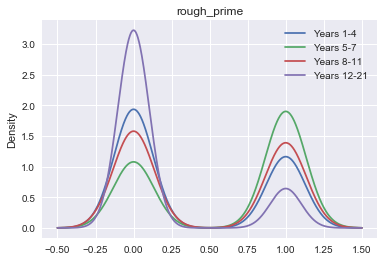

In [105]:
for col in df4:
    plt.figure()
    df4[col].plot(kind='kde', label='Years 1-4')
    df57[col].plot(kind='kde', label='Years 5-7')
    df811[col].plot(kind='kde', label='Years 8-11')
    df21[col].plot(kind='kde', label='Years 12-21')
    plt.title(col)
    plt.legend()

I am going to simplify things further and look at points, total rebounds, and assists over a career which will be represented as years in the league.

In [106]:
simple_df = df.loc[:, ['player', 'pts', 'trb', 'ast', 'years_in_league', 'pos']]

In [107]:
simple_df.describe()

,pts,trb,ast,years_in_league
count,2672.000000,2672.000000,2672.000000,2672.000000
mean,15.177133,5.545621,3.642028,7.811377
std,6.638070,3.145913,2.473030,4.544095
min,0.600000,0.000000,0.000000,1.000000
25%,10.000000,3.100000,1.800000,4.000000
50%,15.000000,4.700000,3.000000,7.000000
75%,19.900000,7.600000,4.900000,11.000000
max,37.100000,18.700000,14.500000,21.000000


In [108]:
simple_df.corr()

,pts,trb,ast,years_in_league
pts,1.000000,0.395978,0.396747,-0.147301
trb,0.395978,1.000000,-0.162003,-0.061263
ast,0.396747,-0.162003,1.000000,-0.093978
years_in_league,-0.147301,-0.061263,-0.093978,1.000000


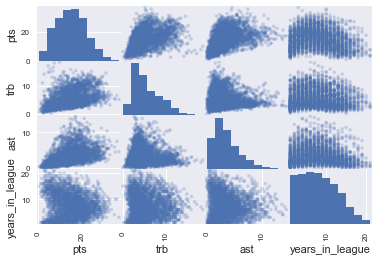

In [109]:
_ = pd.plotting.scatter_matrix(simple_df, 
                               #c=simple_df['pos'],
                               alpha=.25)

The scatter matrix above does not really show much information. Points correlates positively with both rebounds and assists. years_in_league follows an interesting up and down parabola pattern for all three of the other statistics which is what I would expect. A player enters the league and struggles before hitting their prime where they stay until a certain point when their performance drops. I wonder now if it would help to break these up by position.

In [110]:
simple_df = df.loc[:, ['player', 'pos', 'pts', 'trb', 'ast', 'years_in_league']]

In [111]:
simple_df_g = simple_df[(simple_df.pos == 'PG') | (simple_df.pos == 'SG')]
simple_df_f = simple_df[(simple_df.pos == 'SF') | (simple_df.pos == 'PF')
                       | (simple_df.pos == 'C')]

In [112]:
simple_df_f.describe()

,pts,trb,ast,years_in_league
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,15.500144,7.492852,2.419639,8.254152
std,6.857393,3.016561,1.488857,4.755932
min,0.600000,0.700000,0.000000,1.000000
25%,10.200000,5.200000,1.300000,4.000000
50%,15.400000,7.300000,2.200000,8.000000
75%,20.500000,9.600000,3.200000,12.000000
max,32.900000,18.700000,9.100000,21.000000


In [113]:
simple_df_f.corr()

,pts,trb,ast,years_in_league
pts,1.000000,0.437247,0.606275,-0.207043
trb,0.437247,1.000000,0.184797,-0.212528
ast,0.606275,0.184797,1.000000,-0.051838
years_in_league,-0.207043,-0.212528,-0.051838,1.000000


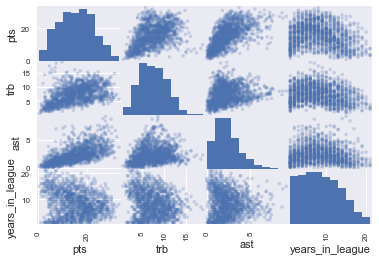

In [114]:
_ = pd.plotting.scatter_matrix(simple_df_f, alpha=.25)

When looking at frontcourt players (SF, PF, C), the correlation between points and rebounds/assists is even stronger

In [115]:
simple_df_g.describe(), simple_df_f.describe()

(               pts          trb          ast  years_in_league
 count  1285.000000  1285.000000  1285.000000      1285.000000
 mean     14.842957     3.444747     4.963658         7.326848
 std       6.373669     1.505213     2.638546         4.253524
 min       1.900000     0.000000     0.000000         1.000000
 25%       9.800000     2.400000     3.000000         4.000000
 50%      14.700000     3.200000     4.600000         7.000000
 75%      19.200000     4.300000     6.600000        10.000000
 max      37.100000    11.100000    14.500000        19.000000,
                pts          trb          ast  years_in_league
 count  1385.000000  1385.000000  1385.000000      1385.000000
 mean     15.500144     7.492852     2.419639         8.254152
 std       6.857393     3.016561     1.488857         4.755932
 min       0.600000     0.700000     0.000000         1.000000
 25%      10.200000     5.200000     1.300000         4.000000
 50%      15.400000     7.300000     2.200000         

In [116]:
simple_df_g.corr()

,pts,trb,ast,years_in_league
pts,1.000000,0.635159,0.458381,-0.081754
trb,0.635159,1.000000,0.461829,-0.076963
ast,0.458381,0.461829,1.000000,-0.049619
years_in_league,-0.081754,-0.076963,-0.049619,1.000000


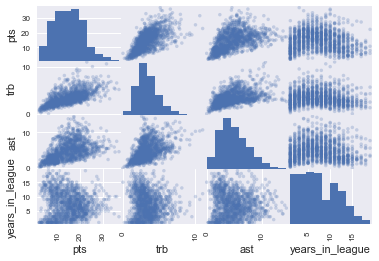

In [117]:
_ = pd.plotting.scatter_matrix(simple_df_g, alpha=.25)

With guards, the dramatic drop in points production over the years is not as dramatic. 
An interesting anomaly with guards is the shape of the years_in_league histogram. There is a steep drop between the bins. 

Next I want to look at the shifted values. Subtract the mean and divide by the std dev.

To start, I want to look at player's stats over time, so I made scatter plots of each column graphed against years_in_league

Here is a quick little go at using k-Nearest Neighbor classification to predict whether a player is an all star.

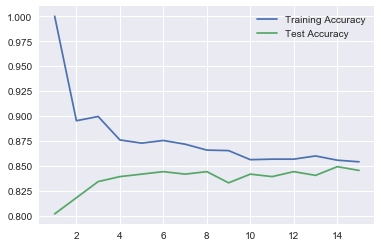

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = knn_df['allstar']
X = knn_df.drop(columns='allstar')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

trained = np.empty(15)
tested = np.empty(15)
n = np.arange(1, 16)
for i, k in enumerate(n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    trained[i] = knn.score(X_train, y_train)
    tested[i] = knn.score(X_test, y_test)

_ = plt.plot(n, trained, label='Training Accuracy')
_ = plt.plot(n, tested, label='Test Accuracy')
_ = plt.xlabel = 'n Neighbors'
_ = plt.ylabel = 'Accuracy'
_ = plt.legend()
_ = plt.show()

Now let's look at other metrics for my classification

C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Drew\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Drew\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


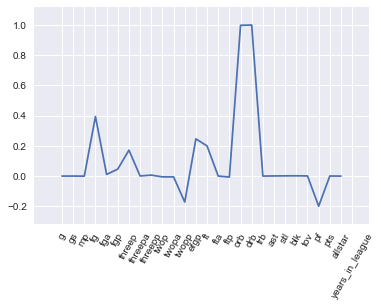

In [92]:
from sklearn.linear_model import Lasso
df_columns = df_int.columns

y = df_int['trb']
X = df_int.drop(columns='trb')
lasso = Lasso(alpha = 0, normalize=True)

lasso.fit(X, y)
lasso_coef = lasso.coef_
# Plot the coefficients
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.1)
plt.show()


((2672, 26), (2672,))

In [ ]:
# create new dataframe with each players data normalized
# against every season in their career
unique = df['player'].unique()
all_norm_df = pd.DataFrame()
for player in unique:
    pnormdf = pd.DataFrame()
    playerdf = df[df['player'] == player]
    years_in_league = np.array(range(1, len(playerdf)+1))
    for col in playerdf:    
        if playerdf[col].dtypes == np.float64:
            statdf = playerdf[col]
            try:
                normdf = pd.DataFrame({col:normalize(statdf)})
                pnormdf = pd.concat([pnormdf, normdf], axis=1)
            except:
                pass
    pnormdf['allstar'] = playerdf['allstar']
    pnormdf['player'] = player
    pnormdf['years_in_league'] = years_in_league
    all_norm_df = pd.concat([all_norm_df, pnormdf])
all_norm_df.head()

In [ ]:
all_norm_df.columns


In [ ]:
years_in_nba = []
unique = df.player.unique()
for player in unique:
    playerdf = df[df['player'] == player]
    years_in_nba.append(list(range(1, len(playerdf)+1)))
    

In [ ]:
years_in_nba

In [ ]:
statistic_df = pd.concat([all_norm_df[['player', 'years_in_league']],
                          season_sum, season_mean], axis=1)

In [ ]:
#rearrange order of dataframe so name and years_in_league are first columns
columns = list(all_norm_df.columns)
columns = ['player', 'years_in_league'] + columns
columns.pop(18)
columns.pop()
all_norm_df = all_norm_df[columns]
all_norm_df = all_norm_df.reset_index(drop=True)
all_norm_df.columns

In [ ]:
# create individual normalized season sum column
s = [row[2:].sum() for i, row in all_norm_df.iterrows()]
season_sum = pd.DataFrame({'season_sum':s})

In [ ]:
# create individual normalized season average column
# the average performance in each statistic
m = [row[2:].mean() for i, row in all_norm_df.iterrows()]
season_mean = pd.DataFrame({'season_mean':m})

In [ ]:
statistic_df.head(10)

In [ ]:
df.head()

I wanted to set a cutoff for a players performance, so I used the quantile function. I compared every season statistic to the cutoff number and returned True or False.

In [ ]:
cutoff =  df.quantile(.75)
cutoff = cutoff.drop(index=['height', 'age', 'g', 'gs', 'mp'])
columns = list(cutoff.index)
cutoff

In [ ]:
above = pd.DataFrame()
for col in columns:
    over = df[col] > cutoff[col]
    above = pd.concat([above, over], axis=1)
above.shape

In [ ]:
sums = pd.DataFrame({'sum':[sum(row) for i, row in above.iterrows()]})
sums = sums.set_index(above.index)
above = pd.concat([above, sums], axis=1)
above.head()

In [ ]:
above.describe()

In [ ]:
joined = df.join(above, rsuffix='_above')
joined['sum'].plot(kind='hist', bins=8, alpha=.5, normed=True)

In [ ]:
joined['sum'].plot(kind='hist', bins=8, cumulative=True, alpha=.4)


In [ ]:
peak_players = joined.loc[:, ['player','age', 'sum']]
peak_players = peak_players[peak_players['sum'] > 8]
peak_players.describe()

In [ ]:
peak_players['sum'].plot(kind='hist', bins=8)